In [1]:
import os
import sys

sys.path.append("..")
os.chdir("/home/sean/HAI/main_server/hai")

In [4]:
%load_ext autoreload
%autoreload 2
from controllers.tests.learner import Learner
import time

In [308]:
start_time = time.time()-3600

In [284]:
import numpy as np

def generate_random_labels():
    return [(start_time + np.random.random()*3600, np.random.randint(2)) for i in range(5)]

In [285]:
from controllers.tests.learner import Learner

cams = ["webcam0", "webcam1"]
learner = Learner("koki", cams, start_time)

In [294]:
labels = {"hue": generate_random_labels(), "tv": generate_random_labels(), "ac": generate_random_labels()}
models, misc = learner.update_models(labels, end_time=start_time+3600)

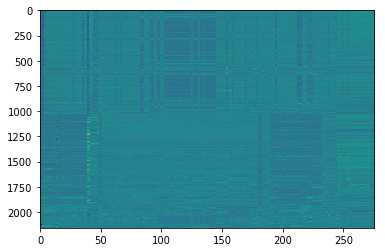

In [295]:
%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

plt.imshow(StandardScaler().fit_transform(misc["matrix"]).T, aspect='auto')

In [296]:
from controllers.utils import get_current_images

In [297]:
imgs = get_current_images("koki", cams)

In [298]:
preds = learner.predict("hue", [imgs])
preds

(array([0], dtype=int32), array([ 0.55]))

total frames: 276
0
0
3
6
9
12
15
18
21
24
27
30
33
36
39
42
45
48
51
54
57
60
63
66
69
72
75
78
81
84
87
90
93
96
99
102
105
108
111
114
117
120
123
126
129
132
135
138
141
144
147
150
153
156
159
162
165
168
171
174
177
180
183
186
189
192
195
198
201
204
207
210
213
216
219
222
225
228
231
234
237
240
243
246
249
252
255
258
261
264
267
270
273


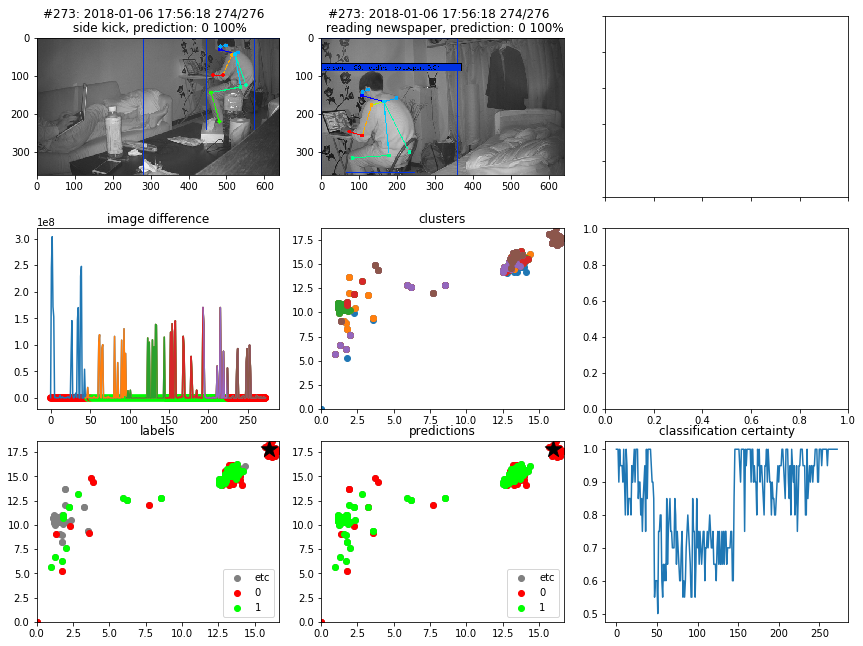

In [307]:
from notebooks.utils.utils import ImageUpdater

ImageUpdater.write_video(cams, models, misc, "hue", "test2.mp4", skip=3)